https://angeloyeo.github.io/2020/08/16/gradient_descent.html

[비용 최소화]  

- 비용함수 R(w)는 변수가 w 파라미터로 이뤄진 함수이며 R(w)를 최소화하는 w0와 w1의 값은 R(w)를 w0, w1으로 순차적으로 편미분해 얻을 수 있다.  
 w1 편미분값 : $-2/N*sigmax*diff$, w0 편미분값 : $-2/N*sigma*diff$
- 업데이트는 새로운 w1을 이전 w1에서 편미분 결과값을 반영하는데 기울기가 양수이면 감소, 음수이면 증가
- 편미분값이 너무 클 수 있기 때문에 보정 계수를 곱하는데 이를 학습률(η)이라고 한다.


https://angeloyeo.github.io/2020/08/16/gradient_descent.html  
https://www.youtube.com/watch?v=ve6gtpZV83E

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    w1_update = np.zeros_like(w1) # 실수 형태 0행렬 반환. 초기화를 위해 선언해 주는 것
    w0_update = np.zeros_like(w0)
    y_pred = np.dot(X, w1.T) + w0 # 행렬 내적하려면 w1의 전치 형태여야 가능
    diff = y - y_pred # 실제값 - 예측값
    w0_factors = np.ones((N,1))
    
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff)) # 이 식은 편미분 결과
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))
    
    return w1_update, w0_update

In [28]:
def gradient_descent_steps(X, y, iters=10000):
    # w0, w1를 모두 0으로 초기화
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    # 경사하강법을 통해 반복 수행
    for i in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        
        return w1, w0

In [29]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred))/N
    return cost

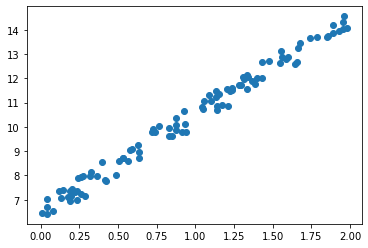

In [19]:
# 임의의 어떤 분포를 만든다. 단, 경향은 y=4x+6을 따르도록.
np.random.seed(0)
X = 2*np.random.rand(100,1)
y = 6 + 4*X + np.random.rand(100,1)
plt.scatter(X,y)
plt.show()

In [31]:
w1, w0 = gradient_descent_steps(X, y, iters=1000)
print(f'w1: {w1[0,0]:.4f}, w0: {w0[0,0]:.4f}')

w1: 0.2214, w0: 0.2062


In [32]:
y_pred = w1[0,0]*X + w0
print(f'Gradient Descent Total Cost: {get_cost(y, y_pred):.4f}')

Gradient Descent Total Cost: 102.6528


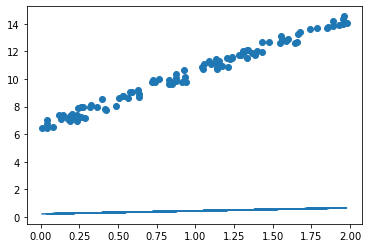

In [33]:
plt.scatter(X,y)
plt.plot(X, y_pred)
plt.show()